In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

mu0= 1.25 * 10 **(-6)

In [3]:
m = (23.43 / 28) * 10 ** (-3)
dm = 0.001 * 10**(-3)
ds = [5.4, 5.4, 5.33, 5.48, 5.37, 5.25, 5.37]
d = np.average(ds) * 10**(-3)
sigma_d = ((np.std(ds) ** 2 + 0.01**2)**0.5 ) * 10 **(-3)

rmaxs = [25, 18, 20, 17, 18, 19, 17.5, 17.3, 18.3, 18.8, 19.5]
rmax = np.average(rmaxs) * 10 ** (-3)
sigma_rmax = np.std(rmaxs) * 10 ** (-3)

In [4]:
print(d, sigma_d, rmax, sigma_rmax)

0.005371428571428572 6.610134457862457e-05 0.01894545454545455 0.0021081502604561085


In [5]:
m_1 = (( 4 * np.pi * m * 10 * (rmax ** 4)) / (mu0 * 6))**0.5
dm_1 = m_1 * ((dm / (2*m))**2 + (2 * sigma_rmax / rmax)**2)**0.5
print(m_1 , dm_1, dm_1 * 100 / m_1)

0.042500250309715874 0.009458441494140027 22.25502538270406


In [6]:
M = 0.322

In [7]:
m_2 = ((4 * np.pi * (d**4) * M * 10) / (6 * mu0))**0.5
dM = 0.05
dm_2 = m_2 * ((dM / (2*M))**2 + (2 * sigma_d / d)**2)**0.5
print(m_2, dm_2, dm_2 * 100 / m_2)

0.06701651594618993 0.005458326156220945 8.144747722492228


In [8]:
B0 = mu0 * m_2 / (2 * np.pi * (d / 2)**3)
dB0 = B0 * ((dm_2 / m_2)**2 + (3 * sigma_d / d)**2)**0.5
print(B0, dB0, dB0 * 100 / B0)

0.6882283570769373 0.061544136266019595 8.94240053220294


In [9]:
print(1.5 * B0, 1.5 * dB0)

1.032342535615406 0.09231620439902939


In [10]:
Bps = [309, 239, 257, 301, 249]
print(np.average(Bps), np.std(Bps), np.std(Bps) / np.average(Bps))

271.0 28.453470790045984 0.10499435715884127


# horizontal part

In [11]:
ns = [x for x in range(3, 13)]
ts1 = [8.41, 8.62, 8.61, 8.72, 8.72]
ts2 = [11.5, 11.57, 11.43, 11.41, 11.27]
ts3 = [14.63, 6.91 * 2, 14.66, 14.69, 14.48]
ts4 = [17.03, 17.34, 16.69, 16.72, 16.56]
ts5 = [19.03, 18.82, 19.28, 18.69, 18.61]
ts6 = [22.4, 22.12, 21.93, 23.46, 22.71]
ts7 = [25.44, 25.04, 25.15, 24.94, 25.41]
ts8 = [27.97, 27.38, 28.13, 27.37, 27.17]
ts9 = [31.28, 30.19, 30.62, 31.06, 30.02]
ts10 = [34.81, 53.34 * 2 / 3, 34.34, 34.91, 33.44]

In [12]:
np.average(ts10)

34.612

In [13]:
np.std(ts10)

0.7034600201859387

In [14]:
t = [np.average(ts1), np.average(ts2), np.average(ts3), np.average(ts4), np.average(ts5)
    , np.average(ts6), np.average(ts7), np.average(ts8), np.average(ts9), np.average(ts10)]
sigma_t = [np.std(ts1), np.std(ts2), np.std(ts3), np.std(ts4), np.std(ts5), np.std(ts6), 
           np.std(ts7), np.std(ts8), np.std(ts9), np.std(ts10)]
t = [x / 10 for x in t]
sigma_t = [x / 10 for x in sigma_t]
et = [100 * sigma_t[i] / t[i] for i in range(len(t))]

In [15]:
[round(x, 2) for x in t]

[0.86, 1.14, 1.45, 1.69, 1.89, 2.25, 2.52, 2.76, 3.06, 3.46]

In [16]:
[round(x, 2) for x in sigma_t]

[0.01, 0.01, 0.03, 0.03, 0.02, 0.05, 0.02, 0.04, 0.05, 0.07]

In [17]:
[round(x, 2) for x in et]

[1.31, 0.88, 2.26, 1.67, 1.29, 2.38, 0.79, 1.36, 1.58, 2.03]

In [87]:
x = ns
y = t
dy = sigma_t

 
0.2804 x + 0.005084


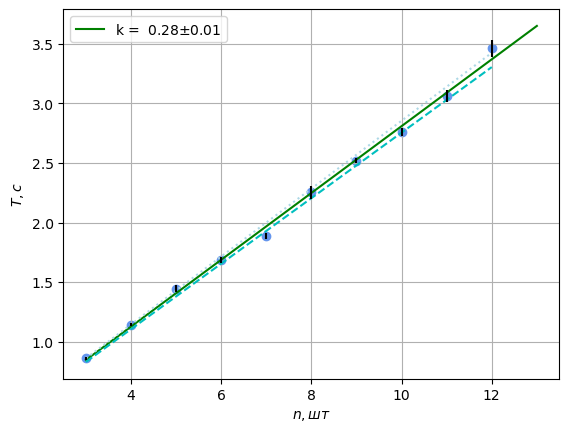

In [88]:
fig, ax = plt.subplots()

plt.scatter(x, y, marker='o', color='cornflowerblue')

model1 = np.poly1d(np.polyfit(x, y, 1))
print(model1)

polyline = np.linspace(ns[0], ns[len(ns)-1] + 1)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .2f}$\pm 0.01$".format(round(model1.c[0], 2)))

x2 = np.linspace(3, 12, 50)
ax.plot(x2, 0.285 * x2 + 0.005, color='lightblue', linestyle=':');
x3 = np.linspace(3, 12, 50)
ax.plot(x3, 0.275 * x3 + 0.005, color='c', linestyle='--');

dk = 0.01

plt.legend()
#ax.set_title('График зависимости $ln(U)(t)$')
plt.errorbar(x, y, yerr=dy, ecolor='k', linestyle='')
#ax.plot(x, y, 'r-')
plt.grid()

plt.ylabel('$T, c$')
plt.xlabel('$n, шт$')
k = round(model1.c[0], 2)
#plt.show()
plt.savefig('tex/plot1.png', bbox_inches='tight')

In [89]:
B_parallel = (2 * np.pi)**2 * m * (d / 2)**2 / (3 * m_2 * k**2)
dB_parallel = B_parallel * ((dm / m)**2 + (2 * sigma_d / d)**2 + (2 * dk / k)**2)**0.5
print(B_parallel, dB_parallel, dB_parallel * 100 / B_parallel)

1.5117307568209878e-05 1.1422553452446828e-06 7.555944337910586


In [90]:
dk * 100 / k

3.571428571428571

In [91]:
r_gr = [4 * d, 3 * d, 2 * d, d]

In [92]:
ns2 = [10, 8, 6, 4]
m_gr = [x * 10 ** (-3) for x in [0.174, 0.2, 0.2, 0.2]]
M_gr = [10 * m_gr[i] * r_gr[i] for i in range(4)]
M_gr

[3.7385142857142865e-05,
 3.2228571428571437e-05,
 2.1485714285714288e-05,
 1.0742857142857144e-05]

In [93]:
dM_gr = [M_gr[i] * ((dm / m_gr[i])**2 + (sigma_d / d)**2)**0.5 for i in range(4)]
dM_gr

[5.077634544886887e-07,
 4.2809459187408273e-07,
 2.8539639458272177e-07,
 1.4269819729136088e-07]

In [97]:
x = ns2
y = [x * 10 ** 5 for x in M_gr]

 
0.4533 x - 0.6274


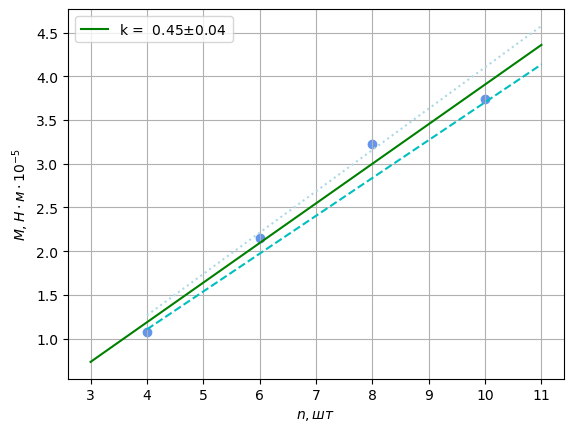

In [99]:
fig, ax = plt.subplots()

plt.scatter(x, y, marker='o', color='cornflowerblue')

model1 = np.poly1d(np.polyfit(x, y, 1))
print(model1)

polyline = np.linspace(3, 11)
plt.plot(polyline, model1(polyline), color = 'green', label="k = {: .2}$\pm 0.04$".format(round(model1.c[0], 2)))
plt.errorbar(x, y, yerr=dM_gr, ecolor='k', linestyle='')

x2 = np.linspace(4, 11, 50)
ax.plot(x2, 0.473 * x2 - 0.627, color='lightblue', linestyle=':');
x3 = np.linspace(4, 11, 50)
ax.plot(x3, 0.433 * x3 - 0.627, color='c', linestyle='--');

dk = 0.04
k = round(model1.c[0], 2)

plt.legend()
#ax.set_title('График зависимости $ln(U)(t)$')
#plt.errorbar(x, y, yerr=dM_gr, ecolor='k', linestyle='')
#ax.plot(x, y, 'r-')
plt.grid()

plt.ylabel('$M, H\cdot м\cdot 10^{-5}$')
plt.xlabel('$n, шт$')
#plt.show()
plt.savefig('tex/plot2.png', bbox_inches='tight')

In [100]:
B_perp = k * 10**(-5) / m_2
dB_perp = B_perp * ((dm_2 / m_2)**2 + (dk / k)**2)**0.5

In [101]:

print(B_perp, dB_perp, dB_perp * 100 / B_perp)

6.714762676730642e-05 8.095377064272465e-06 12.056088135960797


In [104]:
e_theta = ((dB_perp / B_perp)**2 + (dB_parallel / B_parallel)**2)**0.5
theta = B_perp / B_parallel
print(theta, e_theta * theta, e_theta * 100)

4.441771556497989 0.6319839544476449 14.228195809014496


In [116]:
e_theta * theta * 180 / ((theta ** 2 + 1) * np.pi)

1.7468005644286344

In [115]:
math.atan(theta) * 180 / np.pi

77.31223288782469

In [120]:
B = (B_parallel**2 + B_perp**2)**0.5
dB = (dB_parallel**2 + dB_perp**2)**0.5
e_B = dB*100 / B
print(B, dB, e_B)

6.882831371313219e-05 8.175565857265704e-06 11.878201594972152
